## Import Libraries

In [4]:
# Importing the libraries, fill the import name libraries below
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

#Import keras libraries that you need
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, LSTM, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

# EDA

In [5]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real GS Stock Price')
    plt.plot(predicted, color='blue',label='Predicted GS Stock Price')
    plt.title('GS Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('GS Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

# Bagian Baru

In [6]:
# Import Dataset
dataset = pd.read_csv('/content/GS_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,126.70,129.44,124.23,128.87,6188700,GS
2006-01-04,127.35,128.91,126.38,127.09,4862000,GS
2006-01-05,126.00,127.32,125.61,127.04,3717600,GS
2006-01-06,127.29,129.25,127.29,128.84,4319600,GS
2006-01-09,128.50,130.62,128.00,130.39,4723500,GS


In [7]:
# Checking for missing values, choose for data training and set in kind of year
#a : until year training
#b : year for testing
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

### Write your insight in EDA here

Pada GS Stock Price Prediction ini menggunakan model Deep Learning Stock Price Prediction yaitu Recurrent Neural Network (RNN), LSTM, dan GRU.


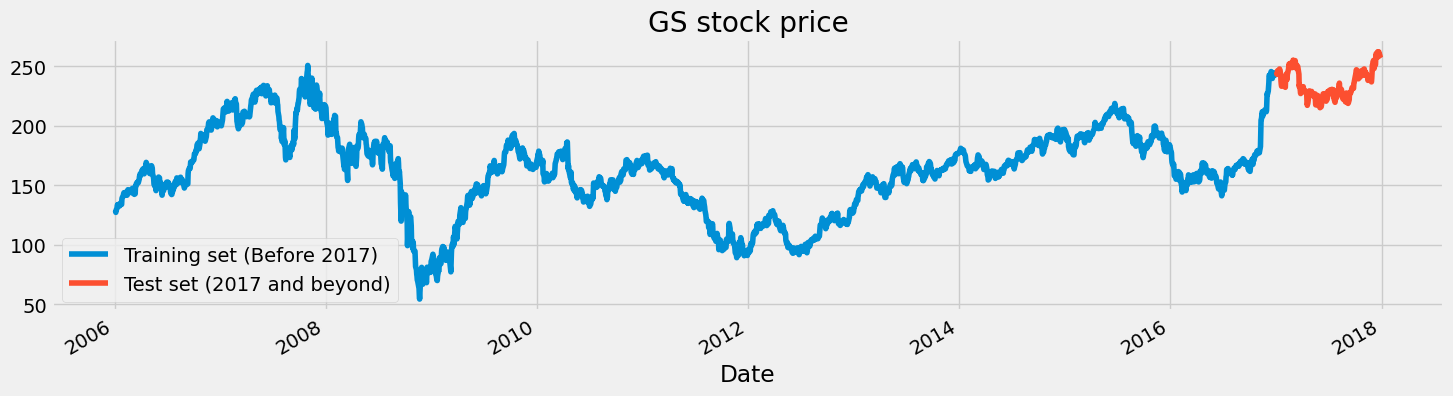

In [8]:
#Checking for stock's market company with line plot
#Write your code below
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('GS stock price')
plt.show()

In [9]:
# Scaling with minmaxscaller for data train
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
#checking shape of data train
training_set_scaled.shape

(2769, 1)

In [11]:
# create data structure to fill how many row for input in your model at data train
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    #fill for x_train and y_train here

#change it into the array
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
# Reshaping X_train before modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Modelling

In [13]:
# Sequential Modelling
model_lstm = Sequential()
# First LSTM layer with Dropout regularisation
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
# Second LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
# Third LSTM layer, fill the code below
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
# Fourth LSTM layer, fill the code below
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
# The output layer
model_lstm.add(Dense(units=1))
# Compiling
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')
# Train fitting for the model
model_lstm.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 38s 289ms/step - loss: 0.0232
Epoch 2/50
85/85 [==============================] - 24s 284ms/step - loss: 0.0109
Epoch 3/50
85/85 [==============================] - 27s 320ms/step - loss: 0.0087
Epoch 4/50
85/85 [==============================] - 27s 318ms/step - loss: 0.0080
Epoch 5/50
85/85 [==============================] - 26s 307ms/step - loss: 0.0069
Epoch 6/50
85/85 [==============================] - 25s 297ms/step - loss: 0.0057
Epoch 7/50
85/85 [==============================] - 27s 320ms/step - loss: 0.0054
Epoch 8/50
85/85 [==============================] - 25s 294ms/step - loss: 0.0050
Epoch 9/50
85/85 [==============================] - 21s 251ms/step - loss: 0.0044
Epoch 10/50
85/85 [==============================] - 21s 246ms/step - loss: 0.0040
Epoch 11/50
85/85 [==============================] - 27s 321ms/step - loss: 0.0040
Epoch 12/50
85/85 [==============================] - 29s 341ms/step - loss: 0.0035
Epoch 13/50
8

In [14]:
# Prepare for data test similar way for data train
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
#Transform the inputs

In [15]:
#checking data test shape
inputs.shape

(311, 1)

# PREDICTION

### - LSTM PREDICT

In [16]:
# Preparing X_test and predicting the prices of the stock's that you choose
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Predicting stocks price
predict_stock_price = model_lstm.predict(X_test)
predict_stock_price = sc.inverse_transform(predict_stock_price)

8/8 [==============================] - 5s 433ms/step


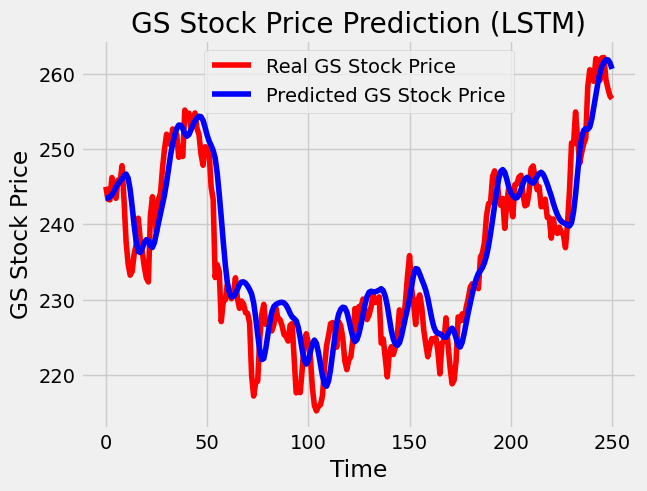

In [17]:
# Visualizing the results for prediction

plt.plot(test_set, color='red',label='Real GS Stock Price')
plt.plot(predict_stock_price, color='blue',label='Predicted GS Stock Price')
plt.title('GS Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('GS Stock Price')
plt.legend()
plt.show()

In [18]:
# Evaluating our model with RMSE function above
return_rmse(test_set,predict_stock_price)

The root mean squared error is 4.596191314271441.


### - GRU PREDICT

In [19]:
# The GRU architecture
LSTM_GRU = Sequential()
# First GRU layer with Dropout regularisation
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Second GRU layer
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Third GRU layer
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Fourth GRU layer
LSTM_GRU.add(GRU(units=50, activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# The output layer
LSTM_GRU.add(Dense(units=1))
# Compiling the RNN
LSTM_GRU.compile(optimizer='SGD',loss='mean_squared_error')
# Fitting to the training set
LSTM_GRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
19/19 [==============================] - 21s 524ms/step - loss: 0.0718
Epoch 2/50
19/19 [==============================] - 8s 454ms/step - loss: 0.0252
Epoch 3/50
19/19 [==============================] - 12s 632ms/step - loss: 0.0233
Epoch 4/50
19/19 [==============================] - 10s 537ms/step - loss: 0.0229
Epoch 5/50
19/19 [==============================] - 8s 444ms/step - loss: 0.0215
Epoch 6/50
19/19 [==============================] - 10s 552ms/step - loss: 0.0203
Epoch 7/50
19/19 [==============================] - 11s 604ms/step - loss: 0.0191
Epoch 8/50
19/19 [==============================] - 10s 564ms/step - loss: 0.0176
Epoch 9/50
19/19 [==============================] - 9s 497ms/step - loss: 0.0169
Epoch 10/50
19/19 [==============================] - 12s 632ms/step - loss: 0.0156
Epoch 11/50
19/19 [==============================] - 10s 533ms/step - loss: 0.0148
Epoch 12/50
19/19 [==============================] - 12s 672ms/step - loss: 0.0140
Epoch 13/50
19/1

In [20]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = LSTM_GRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 [==============================] - 3s 226ms/step


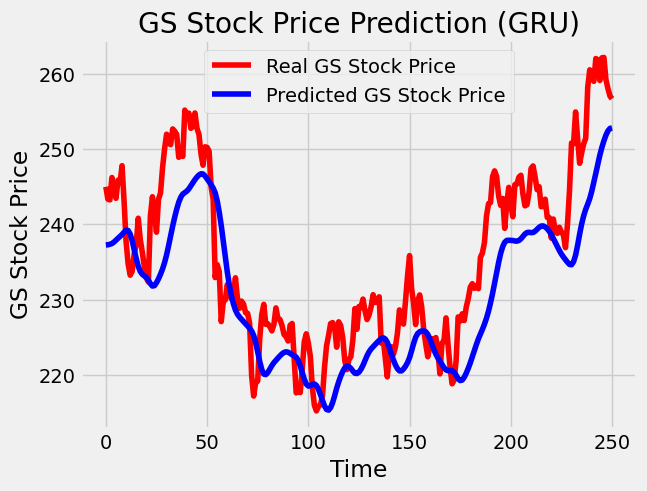

In [21]:
# Visualizing the results for GRU

plt.plot(test_set, color='red',label='Real GS Stock Price')
plt.plot(GRU_predicted_stock_price, color='blue',label='Predicted GS Stock Price')
plt.title('GS Stock Price Prediction (GRU)')
plt.xlabel('Time')
plt.ylabel('GS Stock Price')
plt.legend()
plt.show()

In [22]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 7.343646208064631.
